<a href="https://colab.research.google.com/github/Michelleagl/Series_de_Tiempo/blob/main/Regresi%C3%B3n_Dinamica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Regresión Dinamica**



In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU

In [5]:
import pandas as pd
import numpy as np
import yfinance as yf

stock = 'META'
ticker = yf.Ticker(stock)
df = ticker.history(start= '2013-01-01', end= '2023-12-31', interval='1mo')['Close']

df


,Close
Date,
2013-01-01 00:00:00-05:00,30.887003
2013-02-01 00:00:00-05:00,27.168201
2013-03-01 00:00:00-05:00,25.503214
2013-04-01 00:00:00-04:00,27.686640
2013-05-01 00:00:00-04:00,24.276907
...,...
2023-08-01 00:00:00-04:00,295.001801
2023-09-01 00:00:00-04:00,299.308807
2023-10-01 00:00:00-04:00,300.365631


In [6]:
df.index = df.index.strftime('%Y-%m-%d')
df.index = pd.to_datetime(df.index)

df


,Close
Date,
2013-01-01,30.887003
2013-02-01,27.168201
2013-03-01,25.503214
2013-04-01,27.686640
2013-05-01,24.276907
...,...
2023-08-01,295.001801
2023-09-01,299.308807
2023-10-01,300.365631


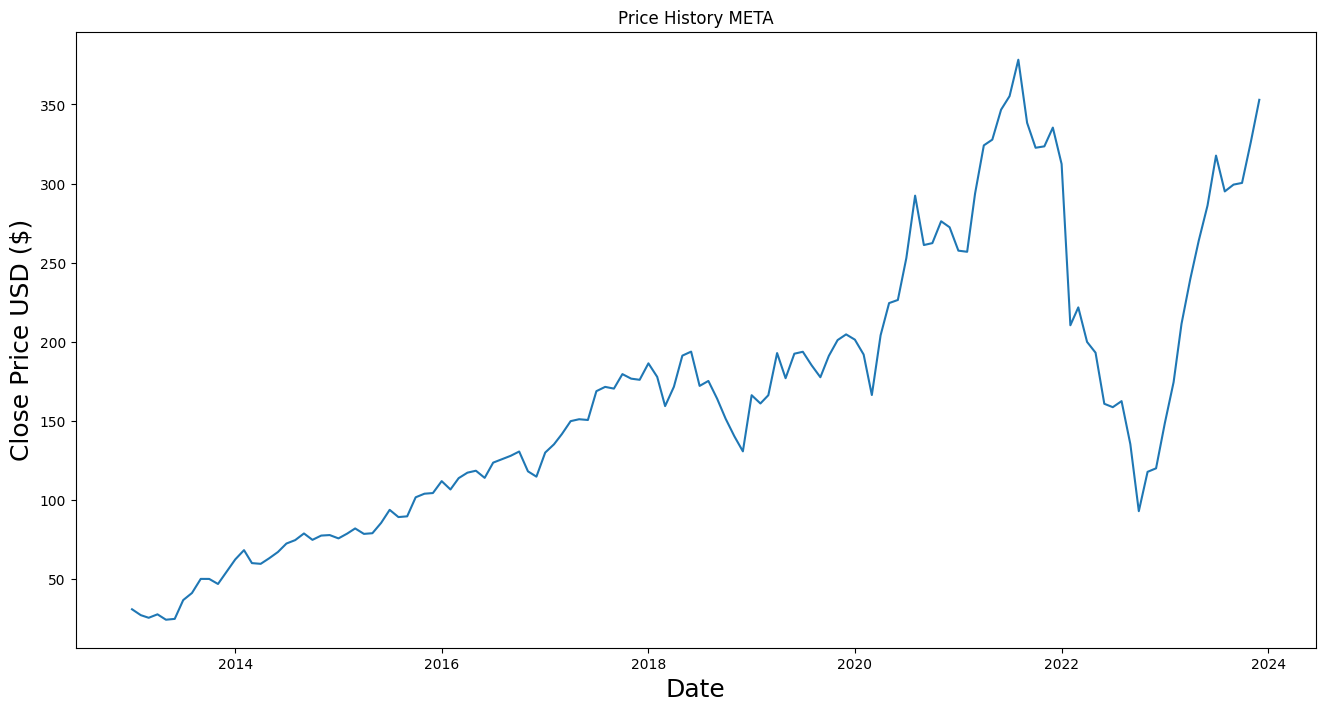

In [9]:
plt.figure(figsize=(16,8))
plt.title('Price History META')
plt.plot(df)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()